# CUDA Instalation

In [ ]:
# !apt-get --purge remove cuda nvidia* libnvidia-*
# !dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
# !apt-get remove cuda-*
# !apt autoremove
# !apt-get update
# !wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
# !dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
# !apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
# !apt-get update
# !apt-get install cuda-9.2
# !pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
# %load_ext nvcc_plugin

In [ ]:
# !nvcc --version

# Imports

In [ ]:
# !pip install pycuda # install cuda

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import errno
import shutil
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import pycuda.driver as cuda
# import pycuda.autoinit
# from pycuda.compiler import SourceModule

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

# Manage Files

In [ ]:
!rm -r data

rm: cannot remove 'data': No such file or directory


In [ ]:
# Create root folder
!mkdir data

In [ ]:
# Create directory in colab environment
!mkdir data/metal

# Copy zip folders into the created folder
!cp '/content/drive/MyDrive/sdw_classification/datasets/compressed/metalmetal100.zip' data/metal

# Unziping the files into the folders and removing the zip folder to free space
!unzip -q '/content/data/metal/metalmetal100.zip' -d data/metal
!rm '/content/data/metal/metalmetal100.zip'

cp: cannot stat '/content/drive/MyDrive/sdw_classification/datasets/compressed/metalmetal100.zip': No such file or directory
unzip:  cannot find or open /content/data/metal/metalmetal100.zip, /content/data/metal/metalmetal100.zip.zip or /content/data/metal/metalmetal100.zip.ZIP.
rm: cannot remove '/content/data/metal/metalmetal100.zip': No such file or directory


In [ ]:
# Create directory in colab environment
!mkdir data/plastic

# Copy zip folders into the created folder
!cp '/content/drive/MyDrive/sdw_classification/datasets/compressed/plasticoplastic100.zip' data/plastic

# Unziping the files into the folders and removing the zip folder to free space
!unzip -q '/content/data/plastic/plasticoplastic100.zip' -d data/plastic
!rm '/content/data/plastic/plasticoplastic100.zip'

# Preprocessing

In [ ]:
!rm -r train
!rm -r test

rm: cannot remove 'train': No such file or directory
rm: cannot remove 'test': No such file or directory


In [ ]:
!mkdir train
!mkdir test

In [ ]:
data_path = '/content/data'
train = '/content/train'
test = '/content/test'

In [ ]:
dims = 200

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  validation_split=0.2)

train_data_gen = image_generator.flow_from_directory(directory=data_path, 
                                                     save_to_dir=train,
                                                     target_size=(dims, dims),
                                                   save_prefix='tr',
                                                   color_mode = "grayscale",
                                                   save_format='webp',
                                                   subset='training')

val_data_gen = image_generator.flow_from_directory(directory=data_path,
                                                   save_to_dir=test,
                                                   target_size=(dims, dims),
                                                   color_mode = "grayscale",
                                                   save_prefix='ts',
                                                   save_format='webp',
                                                   subset='validation')

Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


In [ ]:
images_tr, label_tr = train_data_gen.next()
images_ts, label_ts = val_data_gen.next()

d1 = images_tr.shape[3]

In [ ]:
Xtr = []

for i in range(0, images_tr.shape[0]):
  image =images_tr[i][:, :, 0]
  X_train = np.reshape(image, (1, d1*dims*dims))[0]
  Xtr.append(X_train)

Xts = []

for i in range(0, images_ts.shape[0]):
  images =images_ts[i][:, :, 0]
  Xs_train = np.reshape(images, (1, d1*dims*dims))[0]
  Xts.append(Xs_train)

x_train = pd.DataFrame(Xtr)
x_test = pd.DataFrame(Xts)

y_train = label_tr[:,0]
y_test = label_ts[:,0]

# Model

In [ ]:
knn_cm = []
knn_score = []

svm_cm = []
svm_score = []

rf_cm = []
rf_score = []

#### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)

predict_knn = neigh.predict(x_test)
cm = confusion_matrix(predict_knn, y_test)
score = neigh.score(x_test, y_test)

knn_cm.append(cm)
knn_score.append(score)

print(cm)
print(score)

[[15 17]
 [ 0  0]]
0.46875


#### SVM

In [ ]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)

predict_svm = model.predict(x_test)
cm = confusion_matrix(predict_svm, y_test)
score = model.score(x_test, y_test)

svm_cm.append(cm)
svm_score.append(score)

print(cm)
print(score)

[[15 17]
 [ 0  0]]
0.46875


#### Random Forest

In [ ]:
clf = RandomForestClassifier( random_state=0)
clf.fit(x_train, y_train)

predict_rf = clf.predict(x_test)
cm = confusion_matrix(y_test, predict_rf)
score = clf.score(x_test, y_test)

rf_cm.append(cm)
rf_score.append(score)

print(cm)
print(score)

[[ 4 11]
 [ 5 12]]
0.5


# Automation

In [ ]:
def create_folders():
  root = 'data/'

  # Creating directories
  try:
      os.mkdir(root)
      os.mkdir(root+'metal')
      os.mkdir(root+'plastic')
      os.mkdir('train')
      os.mkdir('test')
  except OSError as e:
      if e.errno == errno.EEXIST:
          print('Directory already exist')
      else:
          raise

  # Copying zip files
  shutil.copy('/content/drive/MyDrive/sdw_classification/datasets/compressed/metalmetal100.zip',
              '/content/data/metal')
  shutil.copy('/content/drive/MyDrive/sdw_classification/datasets/compressed/plasticoplastic100.zip',
              '/content/data/plastic')
  
  # Unziping the files
  with zipfile.ZipFile('/content/data/metal/metalmetal100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/metal')
  with zipfile.ZipFile('/content/data/plastic/plasticoplastic100.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/plastic')

  # Removing zip folders
  os.remove('/content/data/metal/metalmetal100.zip')
  os.remove('/content/data/plastic/plasticoplastic100.zip')

In [ ]:
def processing(paths, dims):

  # Instancing Image Generator
  image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  validation_split=0.2)

  # Processing techniques included
  train_data_gen = image_generator.flow_from_directory(directory=paths[0], 
                                                      save_to_dir=paths[1],
                                                      target_size=(dims, dims),
                                                    save_prefix='tr',
                                                    color_mode = "grayscale",
                                                    save_format='webp',
                                                    subset='training')

  val_data_gen = image_generator.flow_from_directory(directory=paths[0],
                                                    save_to_dir=paths[2],
                                                    target_size=(dims, dims),
                                                    color_mode = "grayscale",
                                                    save_prefix='ts',
                                                    save_format='webp',
                                                    subset='validation')
  
  # Extracting train and test images and labels
  images_tr, label_tr = train_data_gen.next()
  images_ts, label_ts = val_data_gen.next()

  # Shape dimensions
  d1 = images_tr.shape[3]

  # Flattening
  Xtr = []

  for i in range(0, images_tr.shape[0]):
    image =images_tr[i][:, :, 0]
    X_train = np.reshape(image, (1, d1*dims*dims))[0]
    Xtr.append(X_train)

  Xts = []

  for i in range(0, images_ts.shape[0]):
    images =images_ts[i][:, :, 0]
    Xs_train = np.reshape(images, (1, d1*dims*dims))[0]
    Xts.append(Xs_train)

  # Data separation
  x_train = pd.DataFrame(Xtr)
  x_test = pd.DataFrame(Xts)

  y_train = label_tr[:,0]
  y_test = label_ts[:,0]

  return (x_train,x_test,y_train,y_test)

In [ ]:
def models(x_train,x_test,y_train,y_test):
  
  neigh = KNeighborsClassifier(n_neighbors=2)
  neigh.fit(x_train, y_train)

  predict_knn = neigh.predict(x_test)
  cm = confusion_matrix(predict_knn, y_test)
  score = neigh.score(x_test, y_test)

  return (cm,score)

In [ ]:
def remove_folders():
  
  # Rename directories
  os.rename('data/plastic','data/plasticprocessed')
  os.rename('data/metal','data/metalprocessed')

  # Ziping the folders
  shutil.make_archive('plasticprocessed','zip','data/plasticprocessed')
  shutil.make_archive('metalprocessed','zip','data/metalpreprocessed')

  # Copying zip folders
  shutil.copy('plasticprocessed.zip','/content/drive/MyDrive/sdw_classification/datasets/compressed')
  shutil.copy('metalprocessed.zip','/content/drive/MyDrive/sdw_classification/datasets/compressed')

  # Removing folders
  os.remove('plasticprocessed.zip')
  os.remove('metalprocessed.zip')
  shutil.rmtree('data')
  shutil.rmtree('train')
  shutil.rmtree('test')

In [ ]:
def experiments(dims):

  # Manage files 
  create_folders()

  # Image processing
  paths =  ['/content/data','/content/train','/content/test']
  (x_train,x_test,y_train,y_test) = processing(paths,dims)

  # Model training and testing
  (cm,score) = models(x_train,x_test,y_train,y_test)

  # Manage files
  remove_folders()
  
  return (cm,score)

# Manage files


In [ ]:
# Change directory name to identify processed folders
!mv '/data/metal' '/data/metalprocessed'

# Zip the files
!zip -q '/data/metalprocessed' '/content'

# Copy the folder into drive
!cp '/content/metalprocessed.zip' '/content/drive/MyDrive/sdw_classification/datasets/compressed/'

# Remove folder and zip containing files to free disk space
!rm -r '/content/metalprocessed'
!rm '/content/metalprocessed.zip'

In [ ]:
# Change directory name to identify processed folders
!mv '/data/plastic' '/content/plasticprocessed'

# Zip the files
!zip -q '/content/plasticprocessed' '/content'

# Copy the folder into drive
!cp '/content/plasticprocessed.zip' '/content/drive/MyDrive/sdw_classification/datasets/compressed/'

# Remove folder and zip containing files to free disk space
!rm -r '/content/plasticprocessed'
!rm '/content/plasticprocessed.zip'

In [ ]:
# Remove all folders
!rm -r data

# Metodos 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


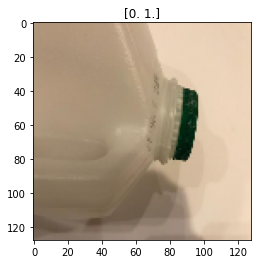

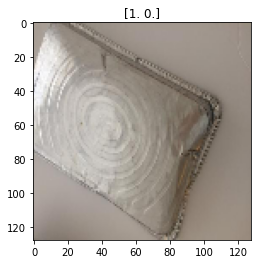

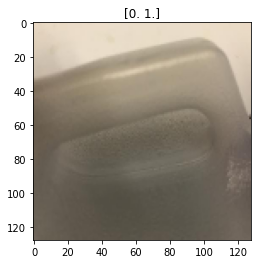

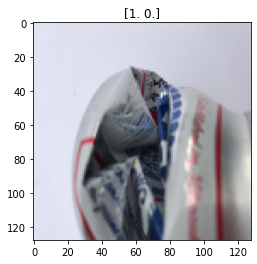

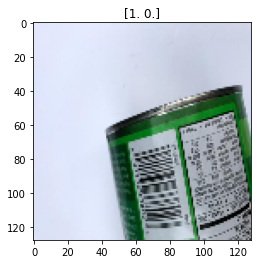

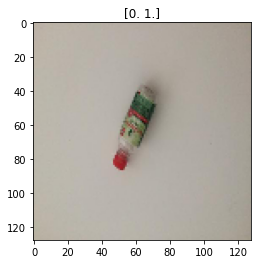

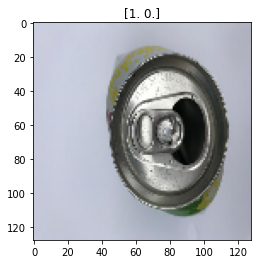

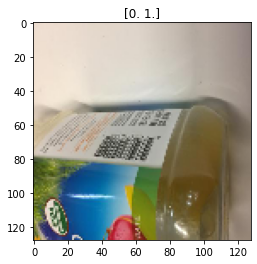

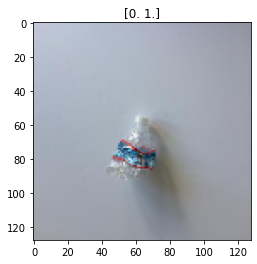

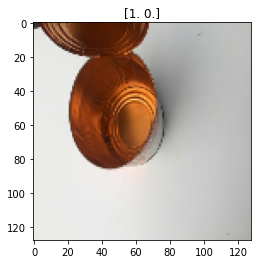

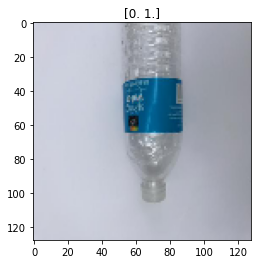

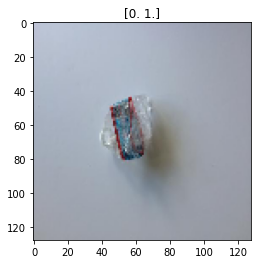

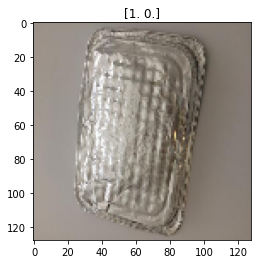

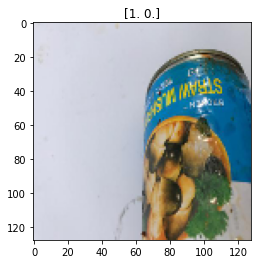

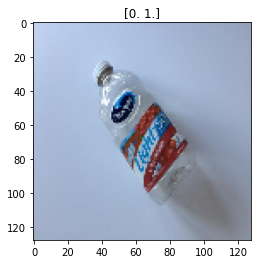

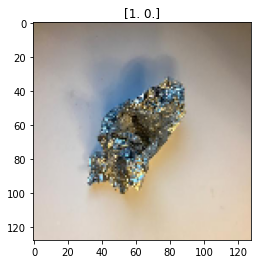

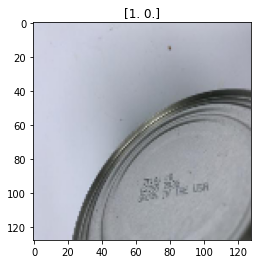

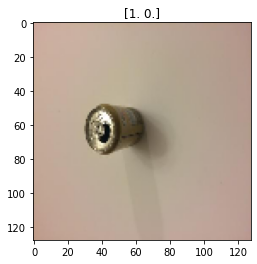

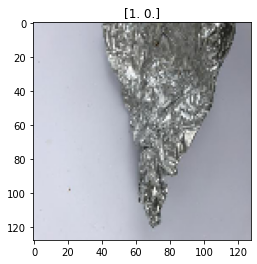

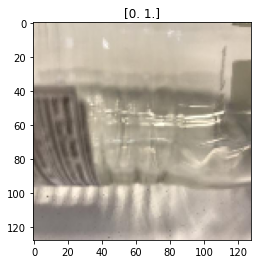

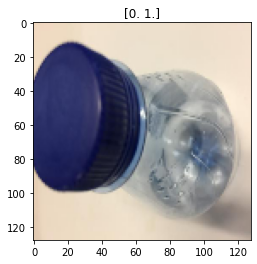

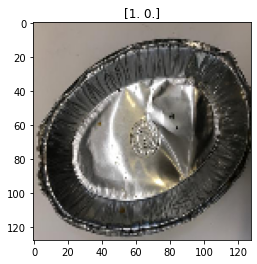

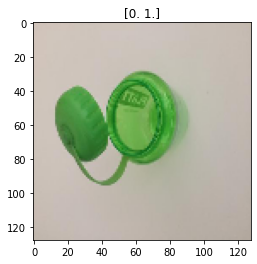

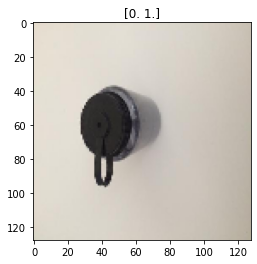

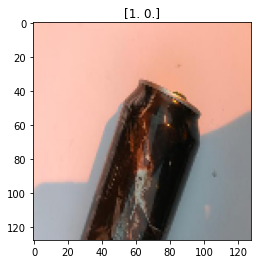

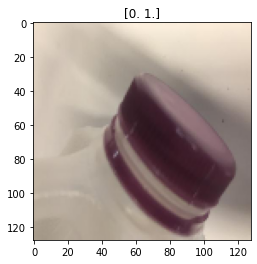

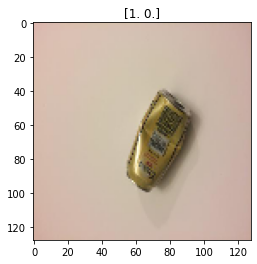

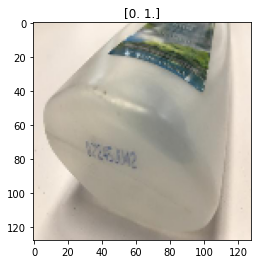

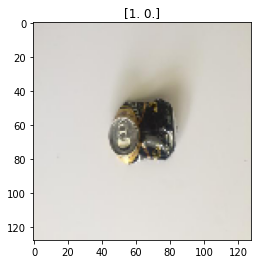

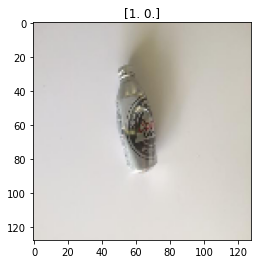

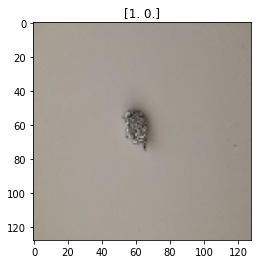

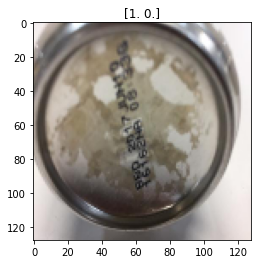

In [ ]:
for i in range(0, images_tr.shape[0]):
    image =images_tr[i][:, :, :]
    plt.imshow(image)
    plt.title(label_tr[i])
    plt.show()

In [ ]:
def create_folders():

  root = 'data'

  try:
      os.mkdir(root)
  except OSError as e:
      if e.errno == errno.EEXIST:
          print('Directory already exist')
      else:
          raise

  folders = str(input('Type the folder names separated by a space: '))
  
  folder_names = folders.split()

  for name in folder_names:
    
    path = root+'/'+name
    
    try:
        os.mkdir(root)
    except OSError as e:
        if e.errno == errno.EEXIST:
            print('Directory already exist')
        else:
            raise